In [2]:
import sys,os,os.path
import math
import random
import matplotlib.pyplot as plt
import time
import glob 
import copy
import enum

import numpy as np
from PIL import Image
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
import torchvision                  

import seaborn as sns
import pandas as pd

In [5]:
import csv

sentences = []
sentiments = []
count = 0
with open('/teamspace/studios/this_studio/data.csv', 'r') as f:
    reader = csv.reader(f)
    # ignore the first line
    next(reader)
    for row in reader:
        sentences.append(row[0])
        sentiments.append(row[1])

In [6]:
word_tokenized_sentences = [ sentence . split () for sentence in sentences ]
print ( word_tokenized_sentences [:2])

[['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'s", 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', ',', 'a', 'Communities', 'Platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.'], ['$ESI', 'on', 'lows,', 'down', '$1.50', 'to', '$2.50', 'BK', 'a', 'real', 'possibility']]


In [8]:
max_len = max ([len ( sentence ) for sentence in
word_tokenized_sentences ])
padded_sentences = [ sentence + ['[PAD]'] * ( max_len - len (sentence ) ) for sentence in word_tokenized_sentences ]
print ( padded_sentences [:2])

[['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'s", 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', ',', 'a', 'Communities', 'Platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], ['$ESI', 'on', 'lows,', 'down', '$1.50', 'to', '$2.50', 'BK', 'a', 'real', 'possibility', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'

In [10]:
from transformers import DistilBertTokenizer

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
bert_tokenized_sentences_ids = [ distilbert_tokenizer.encode ( sentence , padding ='max_length',truncation =True ,max_length = max_len ) for sentence in sentences ]
print ( bert_tokenized_sentences_ids [:2])

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[[101, 1996, 20248, 19454, 13700, 2015, 2974, 2097, 21155, 3841, 12879, 2239, 1005, 1055, 14658, 7300, 2011, 4346, 3295, 2241, 3945, 2974, 1010, 1037, 4279, 4132, 1010, 3295, 7882, 14959, 4180, 1998, 1037, 2047, 1998, 3928, 3293, 2944, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1002, 9686, 2072, 2006, 2659, 2015, 1010, 2091, 1002, 1015, 1012, 2753, 2000, 1002, 1016, 1012, 2753, 23923, 1037, 2613, 6061, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [11]:
bert_tokenized_sentences_tokens = [ distilbert_tokenizer.convert_ids_to_tokens (sentence ) for sentence in bert_tokenized_sentences_ids]
print ( bert_tokenized_sentences_tokens [:2])

[['[CLS]', 'the', 'geo', '##sol', '##ution', '##s', 'technology', 'will', 'leverage', 'ben', '##ef', '##on', "'", 's', 'gps', 'solutions', 'by', 'providing', 'location', 'based', 'search', 'technology', ',', 'a', 'communities', 'platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'], ['[CLS]', '$', 'es', '##i', 'on', 'low', '##s', ',', 'down', '$', '1', '.', '50', 'to', '$', '2', '.', '50', 'bk', 'a', 'real', 'possibility', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '

In [12]:
vocab = {}
vocab['[PAD]'] = 0

# Assuming padded_sentences is defined somewhere in your code
# padded_sentences = [...]
print(vocab)

for sentence in padded_sentences:
    for token in sentence:
        if token not in vocab:
            vocab[token] = len(vocab)

# Convert the tokens to IDs
padded_sentences_ids = [[vocab[token] for token in sentence] for sentence in padded_sentences]
print(padded_sentences_ids[:2])

{'[PAD]': 0}
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 16, 20, 21, 22, 23, 24, 17, 25, 24, 26, 27, 28, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [30, 31, 32, 33, 34, 35, 36, 37, 17, 38, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [13]:
from transformers import DistilBertModel
import torch

model_name = 'distilbert-base-uncased'
distilbert_model = DistilBertModel.from_pretrained(model_name)
# Extract word embeddings
# We will use the last hidden state of the model
# You can use the other hidden states if you want
# The last hidden state is the output of the model
# after passing the input through the model
word_embeddings = []
# Convert padded sentence tokens into ids
for tokens in padded_sentences_ids:
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = distilbert_model(input_ids)
    word_embeddings.append(outputs.last_hidden_state)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [14]:
print(word_embeddings[0].shape)

torch.Size([1, 81, 768])


In [15]:
subword_embeddings = []
for tokens in bert_tokenized_sentences_ids:
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = distilbert_model(input_ids)
    subword_embeddings.append(outputs.last_hidden_state)



In [16]:
print(subword_embeddings[0].shape)

torch.Size([1, 81, 768])


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define function to encode sentiment as one-hot vector
def encode_sentiment(sentiment):
    if sentiment == 'positive':
        return np.array([1, 0, 0])
    elif sentiment == 'neutral':
        return np.array([0, 1, 0])
    elif sentiment == 'negative':
        return np.array([0, 0, 1])
    else:
        raise ValueError("Invalid sentiment value")


sentiments_one_hot =torch.tensor( [encode_sentiment(sentiment) for sentiment in sentiments])

/tmp/ipykernel_3158/2151379526.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  sentiments_one_hot =torch.tensor( [encode_sentiment(sentiment) for sentiment in sentiments])


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define custom dataset class
class CustomSentimentAnalysisDataset(Dataset):
    def __init__(self, word_embeddings, sentiments):
        self.word_embeddings = word_embeddings
        self.sentiments = sentiments

    def __len__(self):
        return len(self.word_embeddings)

    def __getitem__(self, idx):
        word_embedding =(self.word_embeddings[idx])
        sentiment =(self.sentiments[idx])

        return word_embedding, sentiment

In [19]:
from sklearn.model_selection import train_test_split
train_subword_embeddings, test_subword_embeddings, train_sentiments, test_sentiments = train_test_split(subword_embeddings, sentiments_one_hot, test_size=0.2, random_state=42)

# Create DataLoader for training set for subword embeddings
train_dataset = CustomSentimentAnalysisDataset(train_subword_embeddings, train_sentiments)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Create DataLoader for testing set for subword embeddings
test_dataset = CustomSentimentAnalysisDataset(test_subword_embeddings, test_sentiments)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [22]:
torch.save(train_dataset, '/teamspace/studios/this_studio/trainSentencesDataset.pt')
torch.save(test_dataset, '/teamspace/studios/this_studio/testSentencesDataset.pt')

In [4]:
train_dataset = torch.load('/teamspace/studios/this_studio/trainSentencesDataset.pt')
test_dataset = torch.load('/teamspace/studios/this_studio/testSentencesDataset.pt')
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [5]:
class GRUnet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, num_layers, drop_prob=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        out = self.logsoftmax(out)
        return out, h

    def init_hidden(self):
        weight = next(self.parameters()).data
        #                                     batch_size   
        hidden = weight.new(  self.num_layers,     1,         self.hidden_size   ).zero_()
        return hidden

In [30]:
class BiGRUnet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, num_layers, drop_prob=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = True
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, dropout=drop_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply by 2 for bidirectional
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = torch.cat((out[:, -1, :self.hidden_size], out[:, 0, self.hidden_size:]), dim=1)
        out = self.fc(self.relu(out))
        out = self.logsoftmax(out)
        return out, h

    def init_hidden(self, batch_size=1):
        weight = next(self.parameters()).data
        num_directions = 2 if self.bidirectional else 1
        hidden = weight.new(self.num_layers * num_directions, 1, self.hidden_size).zero_()
        return hidden

In [7]:
def run_code_for_training_with_GRU( net,train_dataloader,device, display_train_loss=True):        
    filename_for_out = "performance_numbers_" + str(1) + ".txt"
    FILE = open(filename_for_out, 'w')
    net.to(device)
    ## Note that the TEXTnet and TEXTnetOrder2 both produce LogSoftmax output:
    criterion = nn.NLLLoss()
    accum_times = []
    optimizer = optim.Adam(net.parameters(), lr=1e-4, betas = (0.8, 0.999))
    start_time = time.perf_counter()
    training_loss_tally = []
    for epoch in range(10):  
        print("")
        running_loss = 0.0
        for i, data in enumerate(train_dataloader):    
            hidden = net.init_hidden().to(device)     
            
            review_tensor,sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)

            optimizer.zero_grad()
            for k in range(review_tensor.shape[1]):
               # input[0,:] = review_tensor[0,k]
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0).to(device), hidden)
            loss = criterion(output, torch.argmax(sentiment.unsqueeze(0),1))
            running_loss += loss.item()
            loss.backward(retain_graph=True)        
            optimizer.step()

            if i % 200 == 199:    
                avg_loss = running_loss / float(200)
                training_loss_tally.append(avg_loss)
                current_time = time.perf_counter()
                time_elapsed = current_time-start_time
                print("[epoch:%d  iter:%4d  elapsed_time: %4d secs]     loss: %.5f" % (epoch+1,i+1, time_elapsed,avg_loss))
                accum_times.append(current_time-start_time)
                FILE.write("%.3f\n" % avg_loss)
                FILE.flush()
                running_loss = 0.0
    print("Total Training Time: {}".format(str(sum(accum_times))))
    print("\nFinished Training\n")
    torch.save(net.state_dict(), "/teamspace/studios/this_studio/unigru_word1.pt")
    if display_train_loss:
        plt.figure(figsize=(10,5))
        plt.title("Training Loss vs. Iterations for unidirectional GRU using word embeddings")
        plt.plot(training_loss_tally)
        plt.xlabel("iterations")
        plt.ylabel("training loss")
#                plt.legend()
        plt.legend(["Plot of loss versus iterations"], fontsize="x-large")
        plt.savefig("training_loss.png")
        plt.show()
    return training_loss_tally

In [8]:
def run_code_for_testing_text_classification_with_GRU(net, test_dataloader, device, path):
    net.load_state_dict(torch.load(path))
    net.to(device)
    classification_accuracy = 0.0
    negative_total = 0
    positive_total = 0
    neutral_total = 0
    confusion_matrix = torch.zeros(3, 3)
    
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            review_tensor, sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)
            hidden = net.init_hidden().to(device)
            
            for k in range(review_tensor.shape[1]):
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0), hidden)
                
            predicted_idx = torch.argmax(output).item()
            gt_idx = torch.argmax(sentiment).item()
            if i % 100 == 99:
                print("   [i=%d]    predicted_label=%d       gt_label=%d\n\n" % (i+1, predicted_idx, gt_idx))
            
            if predicted_idx == gt_idx:
                classification_accuracy += 1
            
            if gt_idx == 0: 
                positive_total += 1
            elif gt_idx == 1:
                neutral_total += 1
            elif gt_idx == 2:
                negative_total += 1
                
            confusion_matrix[gt_idx, predicted_idx] += 1
            
    classification_accuracy /= len(test_dataloader)
    print("\nOverall classification accuracy: %0.2f%%" % (classification_accuracy * 100))
    
    out_percent = np.zeros((3,3), dtype='float')
    out_percent[0,:] = 100 * confusion_matrix[0,:] / negative_total
    out_percent[1,:] = 100 * confusion_matrix[1,:] / neutral_total
    out_percent[2,:] = 100 * confusion_matrix[2,:] / positive_total
    
    print("\n\nNumber of negative reviews tested: %d" % negative_total)
    print("\nNumber of neutral reviews tested: %d" % neutral_total)
    print("\nNumber of positive reviews tested: %d" % positive_total)
    
    print("\n\nDisplaying the confusion matrix:\n")


    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'],
                yticklabels=['positive', 'neutral', 'negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for word embeddings for Bidirectional GRU')
    plt.show()

In [9]:
model = GRUnet(768, hidden_size=100, output_size=3, num_layers=3)
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
number_of_learnable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

num_layers = len(list(model.parameters()))

print("\n\nThe number of layers in the model: %d" % num_layers)
print("\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)



The number of layers in the model: 14

The number of learnable parameters in the model: 382503



[epoch:1  iter: 200  elapsed_time:   10 secs]     loss: 1.00386
[epoch:1  iter: 400  elapsed_time:   21 secs]     loss: 0.97820
[epoch:1  iter: 600  elapsed_time:   32 secs]     loss: 1.00245
[epoch:1  iter: 800  elapsed_time:   43 secs]     loss: 0.96928
[epoch:1  iter:1000  elapsed_time:   53 secs]     loss: 1.00619
[epoch:1  iter:1200  elapsed_time:   64 secs]     loss: 0.97326
[epoch:1  iter:1400  elapsed_time:   75 secs]     loss: 0.99919
[epoch:1  iter:1600  elapsed_time:   86 secs]     loss: 1.00345
[epoch:1  iter:1800  elapsed_time:   96 secs]     loss: 0.95021
[epoch:1  iter:2000  elapsed_time:  107 secs]     loss: 0.99014
[epoch:1  iter:2200  elapsed_time:  118 secs]     loss: 0.99476
[epoch:1  iter:2400  elapsed_time:  128 secs]     loss: 1.01896
[epoch:1  iter:2600  elapsed_time:  139 secs]     loss: 0.91889
[epoch:1  iter:2800  elapsed_time:  149 secs]     loss: 0.94908
[epoch:1  iter:3000  elapsed_time:  160 secs]     loss: 0.91030
[epoch:1  iter:3200  elapsed_time:  171

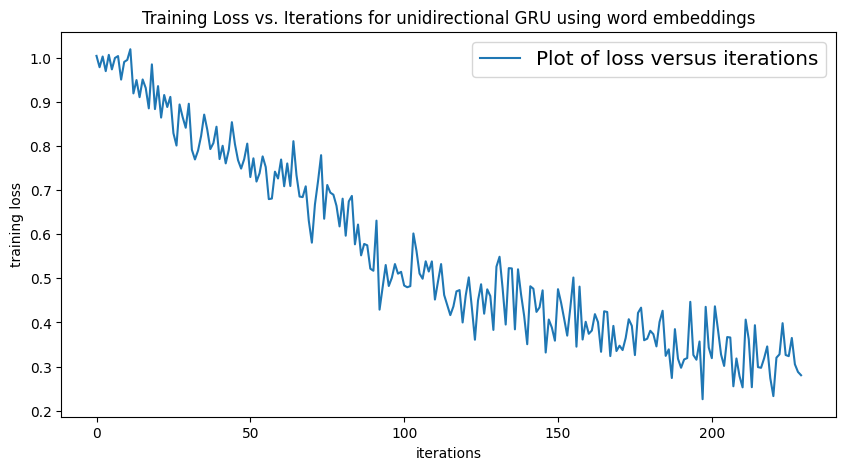

In [10]:
avg_loss_uni1= run_code_for_training_with_GRU(net=model,train_dataloader=train_dataloader, device=device, display_train_loss=True)

   [i=100]    predicted_label=1       gt_label=1


   [i=200]    predicted_label=1       gt_label=2


   [i=300]    predicted_label=0       gt_label=0


   [i=400]    predicted_label=1       gt_label=1


   [i=500]    predicted_label=0       gt_label=0


   [i=600]    predicted_label=1       gt_label=1


   [i=700]    predicted_label=1       gt_label=1


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=0       gt_label=0


   [i=1000]    predicted_label=1       gt_label=2


   [i=1100]    predicted_label=1       gt_label=1



Overall classification accuracy: 76.05%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



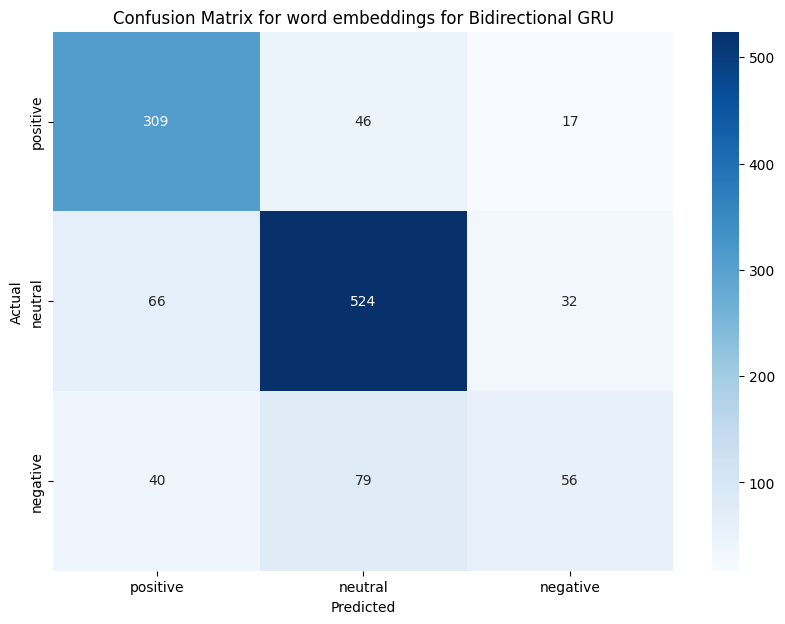

In [12]:
run_code_for_testing_text_classification_with_GRU(net=model,test_dataloader=test_dataloader, device=device, path='/teamspace/studios/this_studio/unigru_word1.pt')

In [31]:
def run_code_for_training_with_BiGRU( net,train_dataloader,device, display_train_loss=True):        
    filename_for_out = "performance_numbers_" + str(10) + ".txt"
    FILE = open(filename_for_out, 'w')
    net.to(device)
    ## Note that the TEXTnet and TEXTnetOrder2 both produce LogSoftmax output:
    criterion = nn.NLLLoss()
    accum_times = []
    optimizer = optim.Adam(net.parameters(), lr=1e-4, betas = (0.8, 0.999))
    start_time = time.perf_counter()
    training_loss_tally = []
    for epoch in range(10):  
        print("")
        running_loss = 0.0
        for i, data in enumerate(train_dataloader):    
            hidden = net.init_hidden().to(device)     
            
            review_tensor,sentiment = data
            review_tensor = review_tensor[0].to(device)
            sentiment = sentiment[0].to(device)

            optimizer.zero_grad()
            for k in range(review_tensor.shape[1]):
                output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0).to(device), hidden)
            loss = criterion(output, torch.argmax(sentiment.unsqueeze(0),1))
            running_loss += loss.item()
            loss.backward(retain_graph=True)        
            optimizer.step()

            if i % 200 == 199:    
                avg_loss = running_loss / float(200)
                training_loss_tally.append(avg_loss)
                current_time = time.perf_counter()
                time_elapsed = current_time-start_time
                print("[epoch:%d  iter:%4d  elapsed_time: %4d secs]     loss: %.5f" % (epoch+1,i+1, time_elapsed,avg_loss))
                accum_times.append(current_time-start_time)
                FILE.write("%.3f\n" % avg_loss)
                FILE.flush()
                running_loss = 0.0
    print("Total Training Time: {}".format(str(sum(accum_times))))
    print("\nFinished Training\n")
    torch.save(net.state_dict(), "bigru_word1.pt")
    if display_train_loss:
        plt.figure(figsize=(10,5))
        plt.title("Training Loss vs. Iterations for Bidirectional GRU using word embeddings")
        plt.plot(training_loss_tally)
        plt.xlabel("iterations")
        plt.ylabel("training loss")
#                plt.legend()
        plt.legend(["Plot of loss versus iterations"], fontsize="x-large")
        plt.savefig("training_loss.png")
        plt.show()
    return training_loss_tally


In [32]:
model_bigru = BiGRUnet(768, hidden_size=100, output_size=3, num_layers=3)
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
number_of_learnable_params_bigru = sum(p.numel() for p in model_bigru.parameters() if p.requires_grad)

num_layers_bigru = len(list(model_bigru.parameters()))

print("\n\nThe number of layers in the model: %d" % num_layers_bigru)
print("\nThe number of learnable parameters in the model: %d" % number_of_learnable_params_bigru)



The number of layers in the model: 26

The number of learnable parameters in the model: 885003



[epoch:1  iter: 200  elapsed_time:   16 secs]     loss: 1.00509
[epoch:1  iter: 400  elapsed_time:   33 secs]     loss: 0.96628
[epoch:1  iter: 600  elapsed_time:   50 secs]     loss: 0.96822
[epoch:1  iter: 800  elapsed_time:   66 secs]     loss: 0.99448
[epoch:1  iter:1000  elapsed_time:   83 secs]     loss: 0.99832
[epoch:1  iter:1200  elapsed_time:   99 secs]     loss: 0.94296
[epoch:1  iter:1400  elapsed_time:  116 secs]     loss: 0.92298
[epoch:1  iter:1600  elapsed_time:  132 secs]     loss: 1.00219
[epoch:1  iter:1800  elapsed_time:  149 secs]     loss: 1.03167
[epoch:1  iter:2000  elapsed_time:  165 secs]     loss: 0.97597
[epoch:1  iter:2200  elapsed_time:  181 secs]     loss: 0.91569
[epoch:1  iter:2400  elapsed_time:  198 secs]     loss: 0.96490
[epoch:1  iter:2600  elapsed_time:  215 secs]     loss: 0.85105
[epoch:1  iter:2800  elapsed_time:  231 secs]     loss: 1.00541
[epoch:1  iter:3000  elapsed_time:  248 secs]     loss: 0.88122
[epoch:1  iter:3200  elapsed_time:  264

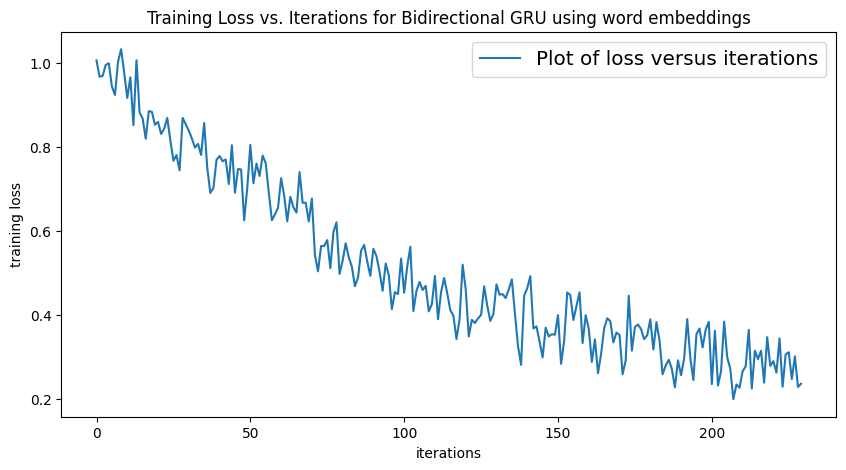

In [33]:
avg_loss_bigru= run_code_for_training_with_BiGRU(net=model_bigru,train_dataloader=train_dataloader, device=device, display_train_loss=True)

   [i=100]    predicted_label=0       gt_label=0


   [i=200]    predicted_label=1       gt_label=1


   [i=300]    predicted_label=0       gt_label=1


   [i=400]    predicted_label=0       gt_label=0


   [i=500]    predicted_label=1       gt_label=1


   [i=600]    predicted_label=0       gt_label=0


   [i=700]    predicted_label=1       gt_label=0


   [i=800]    predicted_label=1       gt_label=1


   [i=900]    predicted_label=1       gt_label=1


   [i=1000]    predicted_label=0       gt_label=0


   [i=1100]    predicted_label=0       gt_label=0



Overall classification accuracy: 77.33%


Number of negative reviews tested: 175

Number of neutral reviews tested: 622

Number of positive reviews tested: 372


Displaying the confusion matrix:



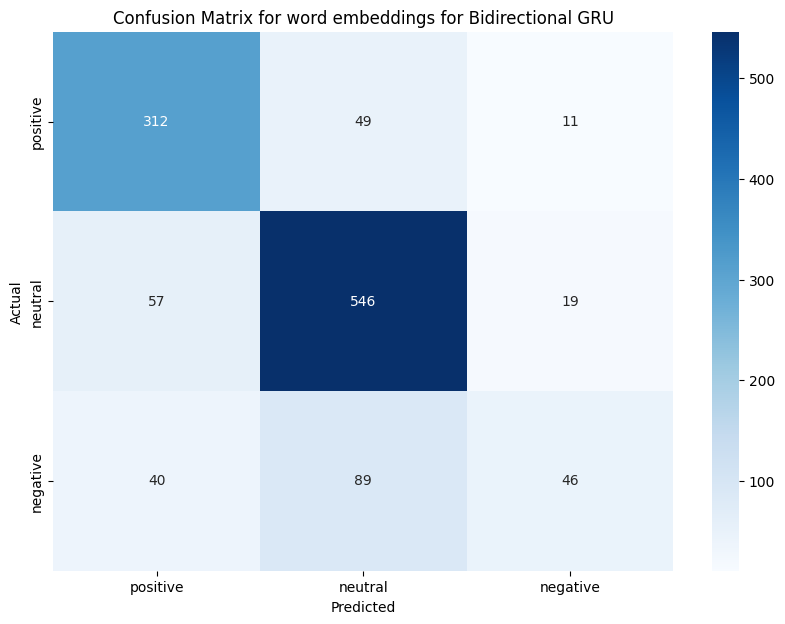

In [34]:
run_code_for_testing_text_classification_with_GRU(net=model_bigru,test_dataloader=test_dataloader, device=device, path='/teamspace/studios/this_studio/bigru_word1.pt')

In [27]:
def run_code_for_training_for_text_classification_with_GRU_1(net, display_train_loss=False): 
            filename_for_out = "performance_numbers_" + str(1) + ".txt"
            FILE = open('/teamspace/studios/this_studio/'+filename_for_out, 'w')
            net.to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
            ##  Note that the GRUnet now produces the LogSoftmax output:
            criterion = nn.NLLLoss()
            accum_times = []
            # optimizer = optim.SGD(net.parameters(), 
            #              lr=1e-3, momentum=0.9)
            optimizer = optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.999))
            start_time = time.perf_counter()
            training_loss_tally = []
            for epoch in range(1):  
                print("")
                running_loss = 0.0
                for i, data in enumerate(train_dataloader):    
                    review_tensor, sentiment = data
                    review_tensor = review_tensor[0]
                    sentiment = sentiment[0]
                    review_tensor = review_tensor.to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
                    sentiment = sentiment.to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
                    ## The following type conversion needed for MSELoss:
                    ##sentiment = sentiment.float()
                    optimizer.zero_grad()
                    hidden = net.init_hidden().to(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
                    for k in range(review_tensor.shape[1]):
                        output, hidden = net(torch.unsqueeze(torch.unsqueeze(review_tensor[0,k],0),0), hidden)
                    # output, hidden = net(review_tensor, hidden)
                    ## If using NLLLoss, CrossEntropyLoss
                    # print(f'Output:{output}')
                    # print(f'Sentiment Argmax:{torch.argmax(sentiment.unsqueeze(0),1)}')
                    loss = criterion(output, torch.argmax(sentiment.unsqueeze(0),1))
                    ## If using MSELoss:
                    ## loss = criterion(output, sentiment)     
                    running_loss += loss.item()
                    loss.backward()
                    optimizer.step()
                    if i % 10 == 9:
                        avg_loss1 = running_loss / float(10)
                    if i % 200 == 199:    
                        avg_loss = running_loss / float(200)
                        training_loss_tally.append(avg_loss)
                        current_time = time.perf_counter()
                        time_elapsed = current_time-start_time
                        print("[epoch:%d  iter:%4d  elapsed_time:%4d secs]     loss: %.5f" % (epoch+1,i+1, time_elapsed,avg_loss))
                        accum_times.append(current_time-start_time)
                        FILE.write("%.3f\n" % avg_loss)
                        FILE.flush()
                        running_loss = 0.0
            print("Total Training Time: {}".format(str(sum(accum_times))))
            print("\nFinished Training\n")
            return net.state_dict(), training_loss_tally, running_loss
            # torch.save(net.state_dict(), '/content/drive/MyDrive/HW9/saved_model/saved_model_gru')
            # if display_train_loss:
            plt.figure(figsize=(10,5))
            plt.title("Training Loss vs. Iterations")
            plt.plot(training_loss_tally)
            plt.xlabel("iterations")
            plt.ylabel("training loss")
#           plt.legend()
            plt.legend(["Plot of loss versus iterations"], fontsize="x-large")
            plt.savefig("training_loss.png")
            plt.show()

In [28]:
model_bigru = BiGRUnet(768, hidden_size=100, output_size=3, num_layers=3)
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
number_of_learnable_params_bigru = sum(p.numel() for p in model_bigru.parameters() if p.requires_grad)

num_layers_bigru = len(list(model_bigru.parameters()))

print("\n\nThe number of layers in the model: %d" % num_layers_bigru)
print("\nThe number of learnable parameters in the model: %d" % number_of_learnable_params_bigru)



The number of layers in the model: 26

The number of learnable parameters in the model: 885003


In [29]:

trained_net_gru, avg_loss_gru, running_loss_gru = run_code_for_training_for_text_classification_with_GRU_1(model_bigru, display_train_loss=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 200x3)